In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Ground Truth Simulation

In [11]:
# Confusion matrix values
TP = 273
FP = 37
FN = 52
TN = 1190

# Total number of samples
total_samples = TP + FP + FN + TN

In [ ]:
total_samples

1552

In [12]:
# Conditional probabilities
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)
negative_predictive_value = TN / (TN + FN)

print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Negative Predictive Value: {negative_predictive_value:.2f}")


Sensitivity (Recall): 0.84
Specificity: 0.97
Precision: 0.88
Negative Predictive Value: 0.96


In [ ]:
# Number of simulations
num_simulations = 10000
size = 1000

# Proportion of true war and not war labels
true_war_proportion = (TP + FN) / total_samples
true_not_war_proportion = (TN + FP) / total_samples

print(f"True War Proportion: {true_war_proportion:.2f}")
print(f"True Not War Proportion: {true_not_war_proportion:.2f}")

True War Proportion: 0.21
True Not War Proportion: 0.79


In [ ]:
# original_samples = []
# for sample in range (num_simulations):
ground_truth = np.random.choice(
    [1, 0], size=size, p=[true_war_proportion, true_not_war_proportion]
    )
# original_samples.append(ground_truth)

In [ ]:
predicted_samples = []
for simulation in range(num_simulations):
    # Simulate the classifier predictions with errors
    predicted_labels = []
    for label in ground_truth:
        if label == 1:  # True war
            predicted_label = np.random.choice(
                [1, 0], p=[(sensitivity), 1 - sensitivity]
            )
        else:  # True not war
            predicted_label = np.random.choice(
                [0, 1], p=[specificity, 1 - specificity]
            )
        predicted_labels.append(predicted_label)

    predicted_labels = np.array(predicted_labels)
    predicted_samples.append(predicted_labels)

In [ ]:
np.sum(predicted_samples[3])

187

In [ ]:
# Calculate proportions from the predicted labels
predicted_war_proportion = np.sum(predicted_samples) / (num_simulations*size)
predicted_not_war_proportion = 1 - predicted_war_proportion

# Print the proportions
print(f"True War Proportion: {true_war_proportion:.4f}")
print(f"Predicted War Proportion: {predicted_war_proportion:.4f}")
print(f"True Not War Proportion: {true_not_war_proportion:.4f}")
print(f"Predicted Not War Proportion: {predicted_not_war_proportion:.4f}")

True War Proportion: 0.2094
Predicted War Proportion: 0.1988
True Not War Proportion: 0.7906
Predicted Not War Proportion: 0.8012


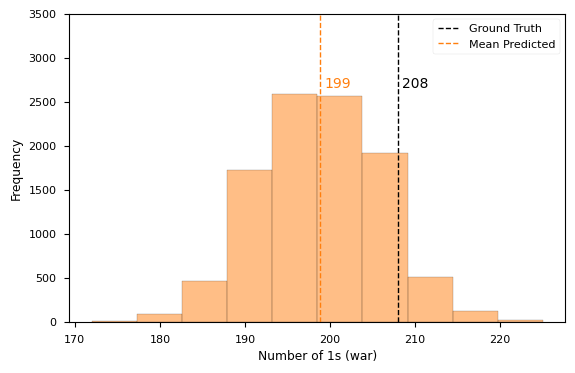

In [ ]:
# Set plots style
plt.style.use('seaborn-v0_8-paper')

# Set the size of the chart
plt.figure(figsize=(6.4, 4))

# Count the number of 1's in each sample for predicted samples
modified_count_of_ones = [sum(sample) for sample in predicted_samples]

default_colours = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Calculate means for both distributions
mean_original = np.sum(ground_truth)
mean_predicted = np.mean(modified_count_of_ones)

# Plot histograms of the counts of 1's
# plt.hist(original_count_of_ones, bins=range(0, 51, 1), alpha=0.5, label='Original Sampling', edgecolor='black')
plt.hist(modified_count_of_ones, alpha=0.5, edgecolor='black', color=default_colours[1])

# Add vertical lines for the means
plt.axvline(mean_original, label='Ground Truth', color='black', linestyle='dashed', linewidth=1)
plt.axvline(mean_predicted, label='Mean Predicted', color=default_colours[1], linestyle='dashed', linewidth=1)

# Add text for the means
plt.text(mean_original+0.5, plt.ylim()[1] * 0.98, f'{mean_original:.0f}', color='black')
plt.text(mean_predicted+0.5, plt.ylim()[1] * 0.98, f'{mean_predicted:.0f}', color=default_colours[1])

# Add titles and labels
#plt.title('Predictions distribution')
plt.xlabel('Number of 1s (war)')
plt.ylabel('Frequency')
# plt.xticks(range(0, 51, 5))
plt.yticks(range(0, 3600, 500))

# Add legend
plt.legend(loc='upper right')

plt.savefig(
    'C:/Users/gatla/OneDrive/BSE/Thesis/charts/bias_correction_hist1.pdf',
    bbox_inches='tight',
)

# Show the plot
plt.show()

## Correcting for the bias

In [ ]:
# Using conditional probabilities to correct for bias
corrected_samples = []

for predicted_labels in predicted_samples:
    corrected_labels = []
    for label in predicted_labels:
        if label == 1:  # Predicted war
            corrected_label = np.random.choice(
                [1, 0], p=[precision, 1 - precision]
            )
        else:  # Predicted not war
            corrected_label = np.random.choice(
                [0, 1], p=[negative_predictive_value, 1 - negative_predictive_value]
            )
        corrected_labels.append(corrected_label)
    
    corrected_labels = np.array(corrected_labels)
    corrected_samples.append(corrected_labels)

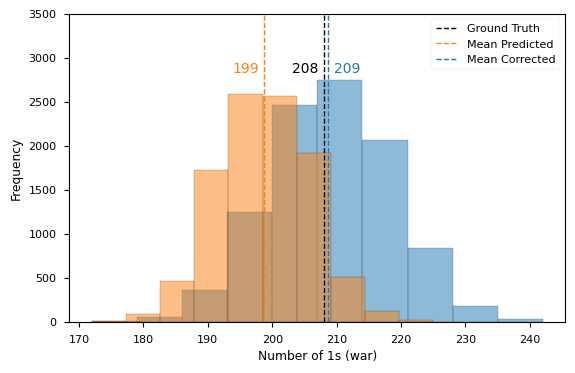

In [ ]:
plt.figure(figsize=(6.4, 4))

# Count the number of 1's in each sample for predicted samples
modified_count_of_ones = [sum(sample) for sample in predicted_samples]
corrected_count_of_ones = [np.sum(sample) for sample in corrected_samples]

# Calculate mean
mean_corrected = np.mean(corrected_count_of_ones)
mean_original = np.sum(ground_truth)
mean_predicted = np.mean(modified_count_of_ones)

default_colours = plt.rcParams['axes.prop_cycle'].by_key()['color']


# Plot histograms of the counts of 1's
plt.hist(corrected_count_of_ones, alpha=0.5, edgecolor='black',color=default_colours[0] )
plt.hist(modified_count_of_ones, alpha=0.5, edgecolor='black', color=default_colours[1] )

# Add vertical lines for the means
plt.axvline(mean_original, label='Ground Truth', color='black', linestyle='dashed', linewidth=1)
plt.axvline(mean_predicted, label='Mean Predicted', color=default_colours[1], linestyle='dashed', linewidth=1)
plt.axvline(mean_corrected, label='Mean Corrected', color=default_colours[0], linestyle='dashed', linewidth=1)

# Add text for the means
plt.text(mean_original -5, plt.ylim()[1] * 0.98, f'{mean_original:.0f}')
plt.text(mean_predicted -5, plt.ylim()[1] * 0.98, f'{mean_predicted:.0f}', color=default_colours[1])
plt.text(mean_corrected +1, plt.ylim()[1] * 0.98, f'{mean_corrected:.0f}', color=default_colours[0])

# Add titles and labels
#plt.title('Predictions distribution')
plt.xlabel('Number of 1s (war)')
plt.ylabel('Frequency')
# plt.xticks(range(0, 51, 5))
plt.yticks(range(0, 3600, 500))

# Add legend
plt.legend(loc='upper right')

plt.savefig(
    'C:/Users/gatla/OneDrive/BSE/Thesis/charts/bias_correction_hist2.pdf',
    bbox_inches='tight',
)

# Show the plot
plt.show()

## Correcting real predictions

In [4]:
# Load predictions
a3_preds = pd.read_csv('predictions/atres_predictions.csv')
la6_preds = pd.read_csv('predictions/la6_predictions.csv')
t5_preds = pd.read_csv('predictions/telecinco_predictions.csv')

In [13]:
# Create list with the different list of predictions for channels
predicted_real = [a3_preds['predicted_class'].tolist(), la6_preds['predicted_class'].tolist(), t5_preds['predicted_class'].tolist()]

# Using conditional probabilities to correct for bias
corrected_real = []

for predicted_labels in predicted_real:
    corrected_labels = []
    for label in predicted_labels:
        if label == 1:  # Predicted war
            corrected_label = np.random.choice(
                [1, 0], p=[precision, 1 - precision]
            )
        else:  # Predicted not war
            corrected_label = np.random.choice(
                [0, 1], p=[negative_predictive_value, 1 - negative_predictive_value]
            )
        corrected_labels.append(corrected_label)
    
    corrected_labels = np.array(corrected_labels)
    corrected_real.append(corrected_labels)

In [19]:
# Add new predictions to dataframe
a3_preds['corrected_preds'] = corrected_real[0]
la6_preds['corrected_preds'] = corrected_real[1]
t5_preds['corrected_preds'] = corrected_real[2]

In [23]:
# Save predictions with bias corrections
a3_preds.to_csv('predictions/a3_bias_corrected.csv', index=False)
la6_preds.to_csv('predictions/la6_bias_corrected.csv', index=False)
t5_preds.to_csv('predictions/t5_bias_corrected.csv', index=False)